# McKinsey Hackathon July

## 1. Load data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
df_train_raw = pd.read_csv('train_raw.csv')
df_train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 13 columns):
id                                  79853 non-null int64
perc_premium_paid_by_cash_credit    79853 non-null float64
age_in_days                         79853 non-null int64
Income                              79853 non-null int64
Count_3-6_months_late               79756 non-null float64
Count_6-12_months_late              79756 non-null float64
Count_more_than_12_months_late      79756 non-null float64
application_underwriting_score      76879 non-null float64
no_of_premiums_paid                 79853 non-null int64
sourcing_channel                    79853 non-null object
residence_area_type                 79853 non-null object
premium                             79853 non-null int64
renewal                             79853 non-null int64
dtypes: float64(5), int64(6), object(2)
memory usage: 7.9+ MB


/Users/jessie/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


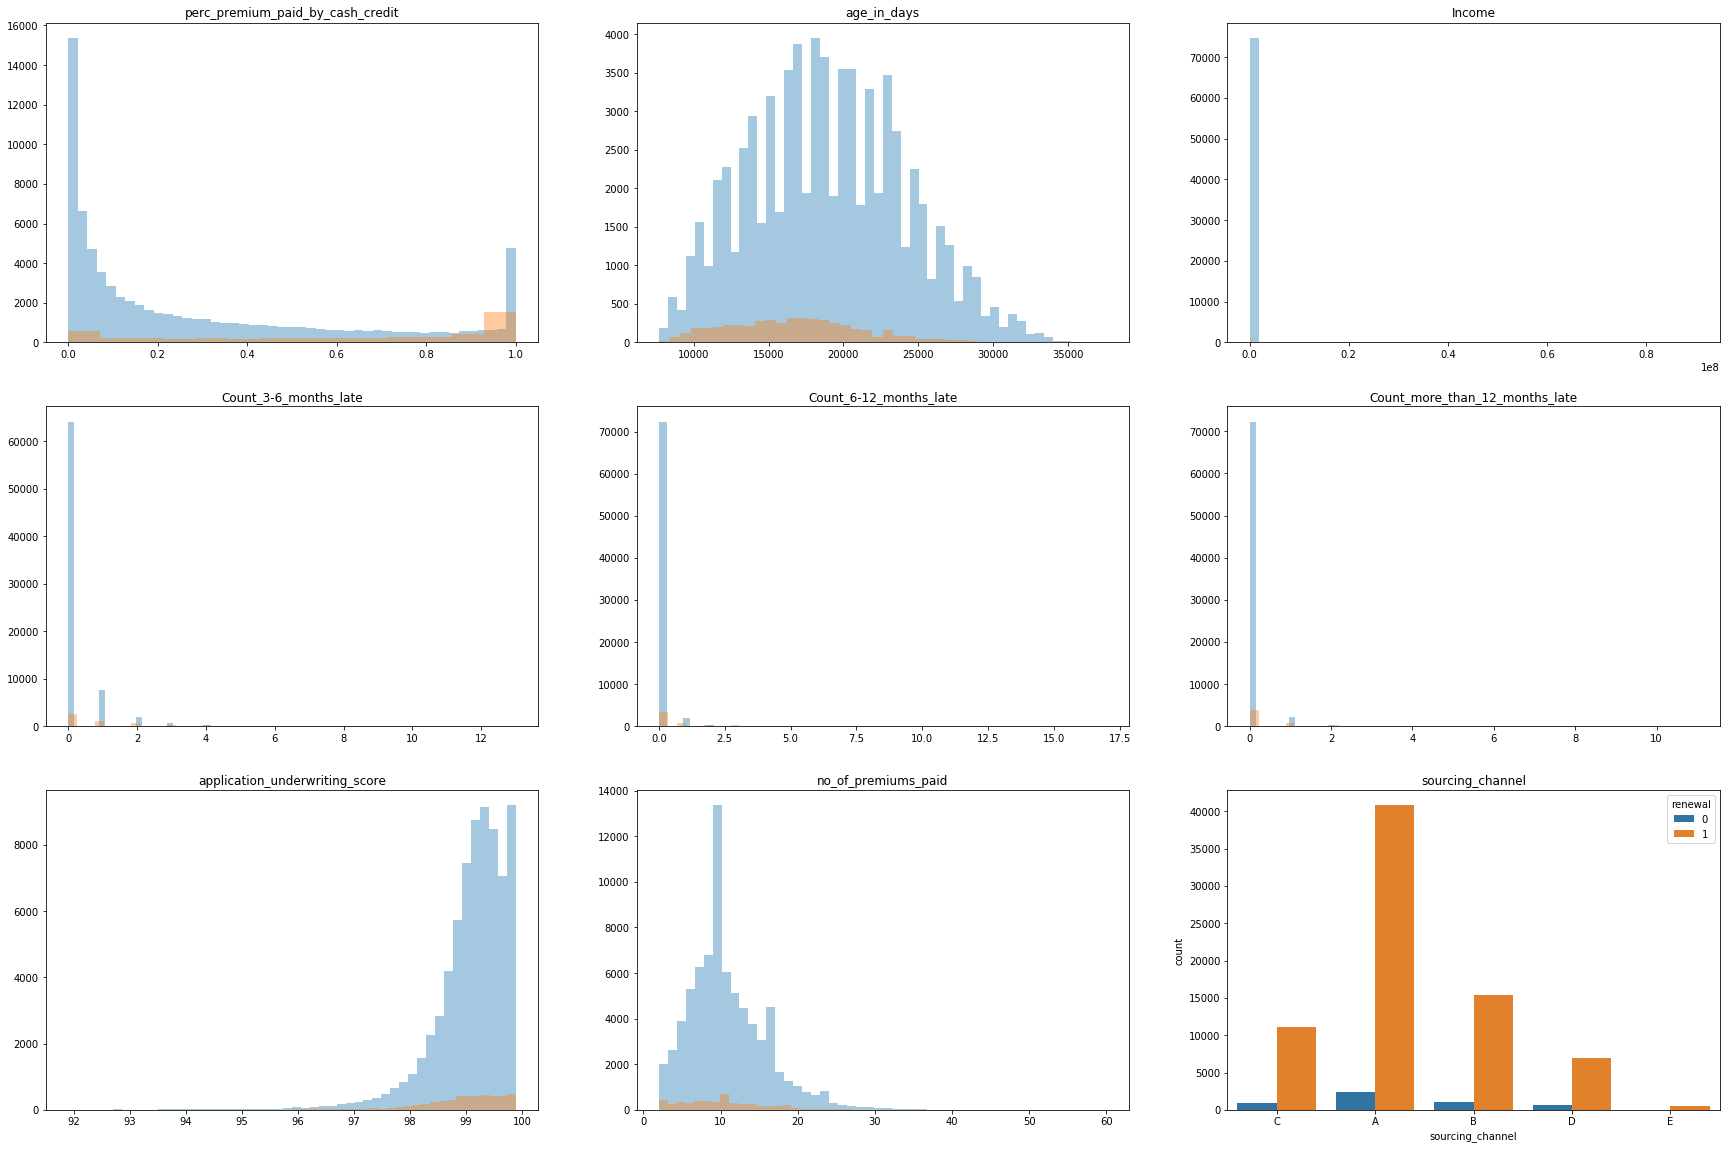

In [3]:
# 2 categorical and 11 numerical predictors

df_train = df_train_raw.set_index('id')
X_train = df_train_raw.drop(['renewal'], 1)

fig, axes = plt.subplots(len(df_train.drop('renewal',1).columns)//3, 3, figsize=(30, 20))
for col, axis in zip(df_train.drop('renewal',1).columns, axes.flatten()):
    df_temp = df_train[[col,'renewal']].dropna()
    if isinstance(df_temp[col].values[0], str):
        sns.countplot(x=col, hue="renewal", data=df_temp, ax = axis)
        axis.set_title(col)
    else:
        stroke_ = df_temp[df_temp['renewal']>0]
        nonstroke_ = df_temp[df_temp['renewal']==0]
        for a in [stroke_, nonstroke_]:
            sns.distplot(a[col].values, ax=axis, kde=False)
        axis.set_title(col)
plt.show()